In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cancer_patient_dataset.csv")

print(df.head())
print(df.info())
print(df.describe())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


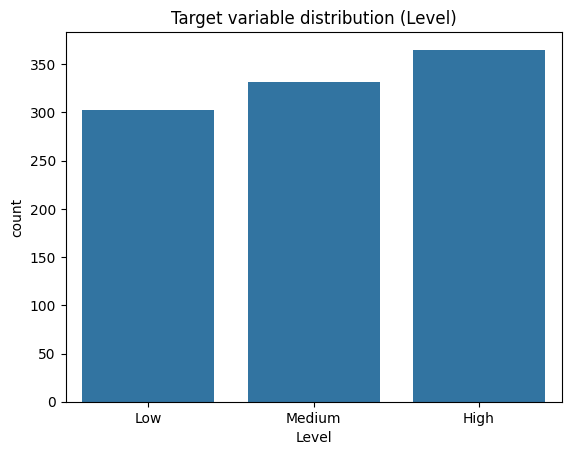

In [3]:
print(df['Level'].value_counts())

sns.countplot(x='Level', data=df)
plt.title("Target variable distribution (Level)")
plt.show()


In [4]:
print("Missing values per column:\n", df.isnull().sum())

# Fill numeric missing values with median
#num_cols = df.select_dtypes(include=['int64','float64']).columns
#df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode
#cat_cols = df.select_dtypes(include=['object']).columns
#for col in cat_cols:
#    df[col] = df[col].fillna(df[col].mode()[0])

Missing values per column:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [5]:
print(df['Gender'].unique())
print(df['Level'].unique())


[1 2]
['Low' 'Medium' 'High']


In [6]:
print("Duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate records: 0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

Here we have used label encoding cuz the feature level has a natural chronology/ ordinal data. The label encoding ensures smooth labelling and no extra columns.

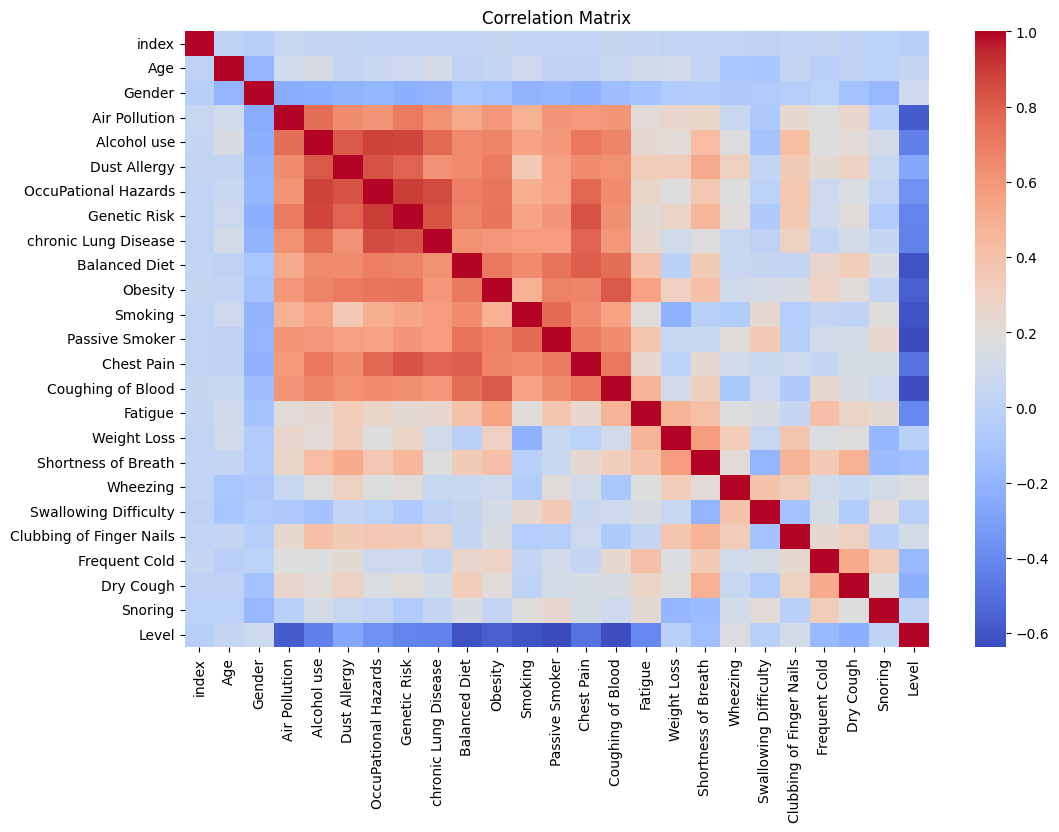

In [8]:
plt.figure(figsize=(12,8))
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['Patient Id'])
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.drop(["Patient Id", "Level"], axis=1)
y = df["Level"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split

# First split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

# Split Train into Train/Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metrics = ['euclidean', 'manhattan', 'minkowski']
results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)  # try k=5 initially
    knn.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train))
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    results.append((metric, train_acc, val_acc, test_acc))
    print(f"{metric}: Train={train_acc:.4f}, Val={val_acc:.4f}, Test={test_acc:.4f}")


euclidean: Train=1.0000, Val=1.0000, Test=1.0000
manhattan: Train=1.0000, Val=1.0000, Test=1.0000
minkowski: Train=1.0000, Val=1.0000, Test=1.0000


In [12]:
results_df = pd.DataFrame(results, columns=["Metric", "Train Accuracy", "Val Accuracy", "Test Accuracy"])
print(results_df)


      Metric  Train Accuracy  Val Accuracy  Test Accuracy
0  euclidean             1.0           1.0            1.0
1  manhattan             1.0           1.0            1.0
2  minkowski             1.0           1.0            1.0


# **LAB 4** task 3 of **Decision Tree**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(["Patient Id", "Level"], axis=1)
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)


In [14]:
dt = DecisionTreeClassifier(random_state=0)

# Fit model
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Decision Tree Training Accuracy:", train_acc)
print("Decision Tree Testing Accuracy:", test_acc)


Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 1.0


In [15]:
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=0) #not necessary
dt_pruned.fit(X_train, y_train)

train_acc_pruned = accuracy_score(y_train, dt_pruned.predict(X_train))
test_acc_pruned = accuracy_score(y_test, dt_pruned.predict(X_test))

print("Pruned DT Training Accuracy:", train_acc_pruned)
print("Pruned DT Testing Accuracy:", test_acc_pruned)


Pruned DT Training Accuracy: 1.0
Pruned DT Testing Accuracy: 1.0


In [16]:
import numpy as np

importances = dt_pruned.feature_importances_
for col, val in zip(X.columns, importances):
    print(f"{col}: {val:.4f}")


index: 0.0000
Age: 0.0000
Gender: 0.0000
Air Pollution: 0.0000
Alcohol use: 0.0000
Dust Allergy: 0.0205
OccuPational Hazards: 0.0755
Genetic Risk: 0.0000
chronic Lung Disease: 0.0000
Balanced Diet: 0.0000
Obesity: 0.1117
Smoking: 0.0000
Passive Smoker: 0.0000
Chest Pain: 0.0000
Coughing of Blood: 0.3897
Fatigue: 0.0000
Weight Loss: 0.0000
Shortness of Breath: 0.0000
Wheezing: 0.2651
Swallowing Difficulty: 0.0000
Clubbing of Finger Nails: 0.0328
Frequent Cold: 0.0000
Dry Cough: 0.0000
Snoring: 0.1047
